In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The dataset we'll be looking at is a study on speed dating. Participants were students in graduate and professional schools at Columbia University.
# The study took place in waves. In each wave, each male participant would go on a speed date with each female participant, and vice versa.
# After each date, each participant decided if they'd like to go on another date with their partner. If both people say yes, it's a match.
# Participants fill out forms containing demographic and other information.
# More detils can be found at https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/867/fisman%20iyengar.pdf

In [3]:
# Load the data and take a peek
df = pd.read_csv('Speed Dating Data.csv')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

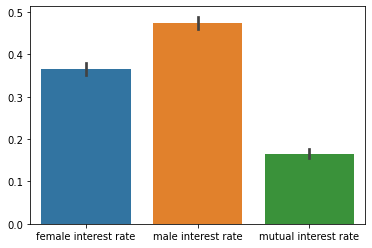

In [4]:
# That's a lot of columns. Good thing we have a document explaining them all.
# For starters, let's see the relationship between gender and interest in another date.
gender_analysis = df[['dec', 'dec_o', 'match']][df['gender'] == 0]
gender_analysis.rename(columns={'dec': 'female interest rate', 'dec_o': 'male interest rate', 'match': 'mutual interest rate'}, inplace=True)
sns.barplot(data=gender_analysis)

/home/ryan/anaconda3/envs/ml/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


[Text(0, 0, 'fun'),
 Text(1, 0, 'meet people'),
 Text(2, 0, 'get a date'),
 Text(3, 0, 'relationship'),
 Text(4, 0, 'to say I came'),
 Text(5, 0, 'other')]

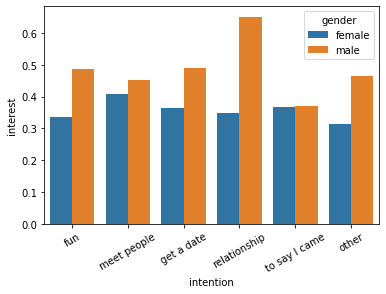

In [5]:
# It looks like men are about 10 percentage points more likely to express interest in their speed date partner than women are.
# It also looks like about 1 in 6 pairs express mutual interest.

# Next, I'm interested in the various intentions people had when deciding to go. Do people with "less serious" intentions have significantly different rates?

intention_analysis = df[['goal', 'gender', 'dec']]
intention_analysis['gender'].replace({0: 'female', 1: 'male'}, inplace=True)
intention_analysis = intention_analysis.groupby(['goal', 'gender']).agg(mean_dec=('dec', 'mean')).reset_index()
ax = sns.barplot(data=intention_analysis, x='goal', y='mean_dec', hue='gender')
ax.set(xlabel='intention', ylabel='interest')
ax.set_xticklabels(labels=['fun', 'meet people', 'get a date', 'relationship', 'to say I came', 'other'], rotation=30)

/home/ryan/anaconda3/envs/ml/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


[Text(0, 0, 'many/week'),
 Text(1, 0, '2/week'),
 Text(2, 0, '1/week'),
 Text(3, 0, '2/month'),
 Text(4, 0, '1/month'),
 Text(5, 0, 'few/year'),
 Text(6, 0, 'rarely')]

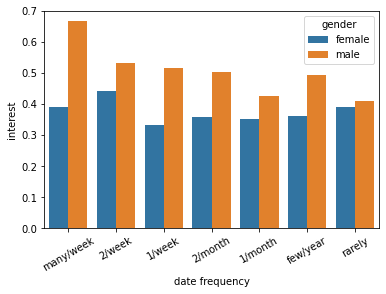

In [6]:
# Stated reasons for showing up have surprisingly little impact on interest in more dates for the most part.
# Notable exceptions are men seeking a serious relationship and men who came "just to say they did".

# Now let's look at how the frequency that participants go on dates affects interest in getting a second date.

dating_analysis = df[['date', 'gender', 'dec']]
dating_analysis['gender'].replace({0: 'female', 1: 'male'}, inplace=True)
dating_analysis = dating_analysis.groupby(['date', 'gender']).agg(mean_dec=('dec', 'mean')).reset_index()
ax = sns.barplot(data=dating_analysis, x='date', y='mean_dec', hue='gender')
ax.set(xlabel='date frequency', ylabel='interest')
ax.set_xticklabels(labels=['many/week', '2/week', '1/week', '2/month', '1/month', 'few/year', 'rarely'], rotation=30)

/home/ryan/anaconda3/envs/ml/lib/python3.9/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


[Text(0, 0, 'many/week'),
 Text(1, 0, '2/week'),
 Text(2, 0, '1/week'),
 Text(3, 0, '2/month'),
 Text(4, 0, '1/month'),
 Text(5, 0, 'few/year'),
 Text(6, 0, 'rarely')]

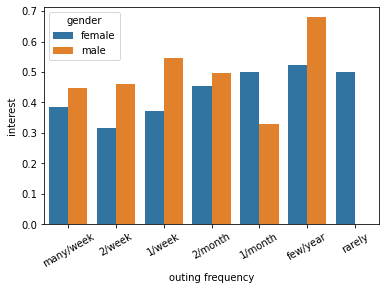

In [7]:
# Women don't show a clear trend here but men who go on fewer dates seem less interested in dates.
# This makes it look like more introverted men show less interest in dating.

# Let's see if we can confirm this by looking at how often people go out on non-dates.

outing_analysis = df[['go_out', 'gender', 'dec']]
outing_analysis['gender'].replace({0: 'female', 1: 'male'}, inplace=True)
outing_analysis = outing_analysis.groupby(['go_out', 'gender']).agg(mean_dec=('dec', 'mean')).reset_index()
ax = sns.barplot(data=outing_analysis, x='go_out', y='mean_dec', hue='gender')
ax.set(xlabel='outing frequency', ylabel='interest')
ax.set_xticklabels(labels=['many/week', '2/week', '1/week', '2/month', '1/month', 'few/year', 'rarely'], rotation=30)

Text(0.5, 1.0, 'Match Rates')

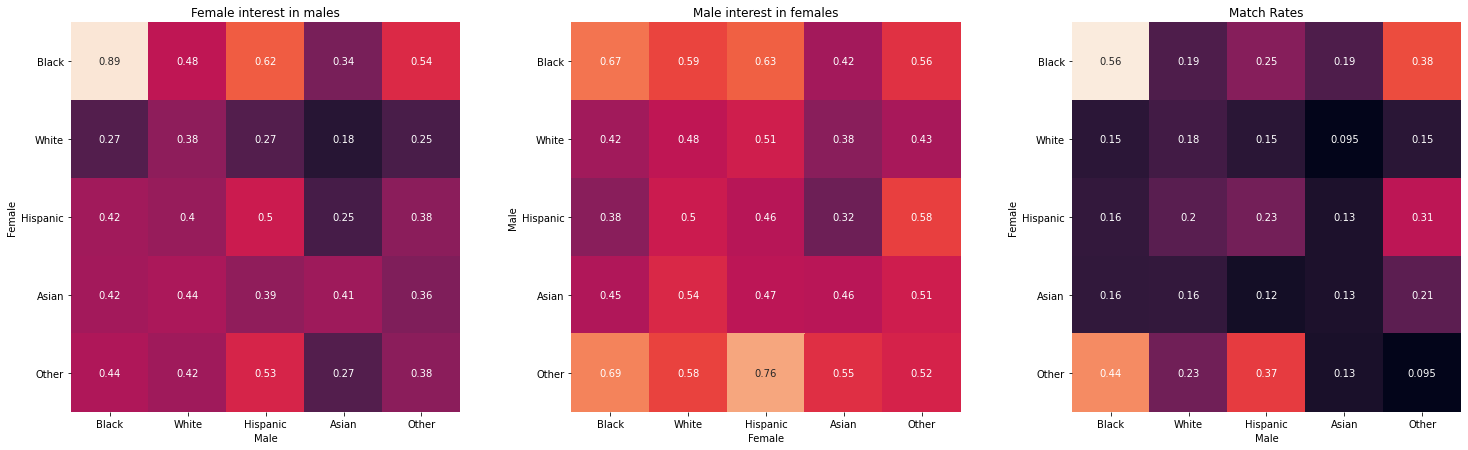

In [8]:
# Turns out my hypothesis was wrong. There's no clear trend for men or women.
# It looks like interest might be higher in women who go out less but the many/week category suggests otherwise.
# How often people go out doesn't have the same kind of impact on date interest that people who don't date does.

# Let's look at how race affects dating preferences.

race_analysis_f = df[['race', 'race_o', 'dec']][df['gender'] == 0]
race_analysis_f = race_analysis_f.groupby(['race', 'race_o']).agg(mean_dec=('dec', 'mean')).reset_index()
race_analysis_f = np.array([race_analysis_f.iloc[i].mean_dec for i in range(25)]).reshape(5,5)
race_analysis_m = df[['race', 'race_o', 'dec']][df['gender'] == 1]
race_analysis_m = race_analysis_m.groupby(['race', 'race_o']).agg(mean_dec=('dec', 'mean')).reset_index()
race_analysis_m = np.array([race_analysis_m.iloc[i].mean_dec for i in range(25)]).reshape(5,5)
race_analysis = df[['race', 'race_o', 'match']][df['gender'] == 0]
race_analysis = race_analysis = race_analysis.groupby(['race', 'race_o']).agg(mean_match=('match', 'mean')).reset_index()
race_analysis = np.array([race_analysis.iloc[i].mean_match for i in range(25)]).reshape(5,5)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(21, 6)
plt.tight_layout()
sns.heatmap(data=race_analysis_f, vmin=0.1, vmax=0.9, square=True, cbar=False, annot=True, ax=ax[0],)
ax[0].set_xticklabels(labels=['Black', 'White', 'Hispanic', 'Asian', 'Other'], rotation=0)
ax[0].set_yticklabels(labels=['Black', 'White', 'Hispanic', 'Asian', 'Other'], rotation=0)
ax[0].set_ylabel('Female')
ax[0].set_xlabel('Male')
ax[0].set_title('Female interest in males')
sns.heatmap(data=race_analysis_m, vmin=0.1, vmax=0.9, square=True, cbar=False, annot=True, ax=ax[1])
ax[1].set_xticklabels(labels=['Black', 'White', 'Hispanic', 'Asian', 'Other'], rotation=0)
ax[1].set_yticklabels(labels=['Black', 'White', 'Hispanic', 'Asian', 'Other'], rotation=0)
ax[1].set_ylabel('Male')
ax[1].set_xlabel('Female')
ax[1].set_title('Male interest in females')
sns.heatmap(data=race_analysis, cbar=False, square=True, annot=True, ax=ax[2])
ax[2].set_xticklabels(labels=['Black', 'White', 'Hispanic', 'Asian', 'Other'], rotation=0)
ax[2].set_yticklabels(labels=['Black', 'White', 'Hispanic', 'Asian', 'Other'], rotation=0)
ax[2].set_ylabel('Female')
ax[2].set_xlabel('Male')
ax[2].set_title('Match Rates')

<ipython-input-9-5202bb1a3563>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_analysis['age_diff'] = age_analysis['age_o'] - age_analysis['age']


[Text(0, 0, 'female'), Text(1, 0, 'male')]

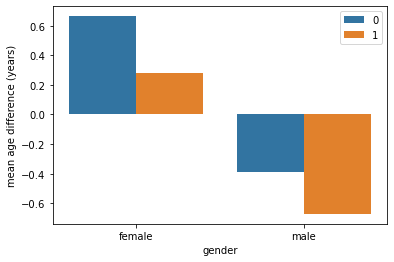

In [9]:
# Lots of interesting things to note here. Asian men are not popular with non asian women. White women tend not to like non-white men.
# Black women are very likely to have interest in black men. Asian and black women are a bit less popular overall.
# "Other" men tend to be very interested in all women but especially black and hispanic women.

# Lastly, I'd like to look at how age difference affected dating
age_analysis = df[['gender', 'dec', 'age', 'age_o']]
age_analysis['age_diff'] = age_analysis['age_o'] - age_analysis['age']
age_analysis = age_analysis.groupby(['gender', 'dec']).agg(mean_age_diff=('age_diff', 'mean')).reset_index()
ax = sns.barplot(data=age_analysis, x='gender', y='mean_age_diff', hue='dec')
ax.set(xlabel='gender', ylabel='mean age difference (years)')
ax.legend()
ax.set_xticklabels(labels=['female', 'male'], rotation=0)

# A decision of 1 indicates interest in the partner while a decision of 0 indicates a lack of interest.
# A positive age difference indicates an older partner while a negative age difference indicates a younger partner

In [ ]:
# We see that the female participants are slightly younger than male participants on average. Additionally, men seem to have a slight preference for younger women while
# women have a slight preference for men who are younger or closer to their own age.